## <p style="text-align: right;"> &#9989; Guangran Wang</p>

# CMSE 202 Midterm (Section 001 - Spring 2018)

The goal of this midterm is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll practice setting up a GitHub repository, committing and pushing repository changes, downloading data with command line tools, writing a python class, and using a new-to-you Python package. You should find that you have all of the skills necessary to complete this exam with even just eight weeks of CMSE 202 under your belt!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, try doing Parts 1 and 2 first so that you have your repository set up and you download the provided data files as they will be necessary to complete the assigned tasks. Let your instructor know right away if you have problems downloading the data!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**Keep your eye on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

---
## Part 1: Setting up a repository for tracking changes (15 points)

Before you get too far along in the assignment, you need to set up a **private** GitHub repository that you will store this notebook in and track the changes as you make them. For this section you should:

1. Set up a new **private** Git repository on GitHub.
2. Clone the repository onto your computer.
3. Move this notebook into that repository and then add it and commit it to the repository and push the changes to the remote repository (**Suggestion**: You may want save and close this notebook before you move to the repository and then reopen it after you move it to make sure that you're working with the right copy of the notebook.)
4. Add your instructor as a Collaborator to your respository. As a reminder, your instructor's username is: devinsilvia

From this point on you will occasionally be asked to save the state of your notebook, commit the changes, and push it to your new repository.

**Note**: If you're struggling with getting the Git repository set up, you can always just work on the notebook as is and try to come back and figure out the repository component later. You may lose some points though since you won't have periodic commits as you make progress along the way, but it will be better than not working on the other parts of the exam!

---
## Part 2: Download the data! (10 points)


We will use a Spartan logo for the experiments below. Download this image "spartan.jpg" from:

`http://devinsilvia.com/cmse202/spartan.jpg`

and place it in your current folder. 


**Question (10 points):** What is the command we have learned in this course that can be used to download the image?



<font size=8 color="#009600">&#9998;</font> wget

---
## Part 3: Loading/Reading unfamiliar data in Python (10 points)


In this part, we will load and display the Spartan logo in Python.


**Question (10 points):** Using whatever Python tools you need, write some code to display the image in Python. 

Populating the interactive namespace from numpy and matplotlib


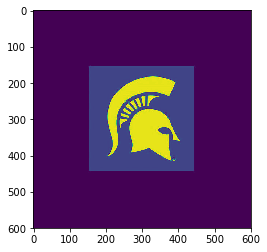

In [7]:
# Put your code here
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('spartan.jpg')
imgplot = plt.imshow(img)
plt.show()

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 3".
---

## Part 4: Using a new package (25 points)


In computed tomography (CT), beams of X-ray are sent to the tissue from various directions. As  a beam travels through, its intensity drops due to the absorption by the cells. A CT machine is designed to measure these drops and then reconstruct the internal structure (more precisely, to reconstruct the absorption coefficient) from such data. The mapping that transforms the internal structure to the intensity drops is known as the Radon transform (https://en.wikipedia.org/wiki/Radon_transform). We will explore the Radon transform of the Spartan logo in this part.



**Question (15 points):** Find out which Python package can be used to compute the Radon transform. Write down the command you may use to download and install this package.

Note: The package may or may not have been included in your Anaconda installation. However, please write down the command even if it has been installed. If it is not included, you will need to install it to answer some of the questions in this exam.

<font size=8 color="#009600">&#9998;</font> 

- Using skimage package to compute this transform

- pip install -U scikit-image


**Now**, for this part, we will take a "CT scan" (i.e., the Radon transform) of the Spartan logo. The generated data is a collection of intensity drops often known as a "sinogram". 

**Question (10 points):** Find and read the documentation for using the package to take Radon transforms. Apply this to the Spartan logo to generate its sinogram.

You should end up with an image that looks something like this:

<img src=https://i.imgur.com/xxESJSK.png>

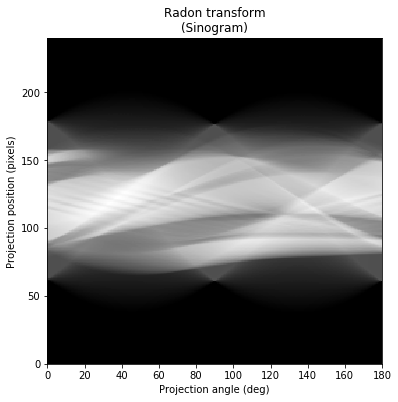

In [47]:
# Put your code for creating the sinogram here
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale, iradon_sart
plt.figure(figsize=(6,6))
image1 = imread("spartan.jpg", as_grey=True)
image = rescale(image1, scale=0.4, mode='reflect')
theta = np.linspace(0., 180., max(image.shape))
sinogram = radon(image, theta=theta, circle=True)
plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Projection angle (deg)")
plt.ylabel("Projection position (pixels)")
plt.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

plt.show()



---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 5".
---

## Part 5: Working with the the data (20 points)


In a real CT scan, one has no access to the true image but only to its sinogram, thus the ultimate goal in a CT scan is to reconstruct the image from its sinogram. The reconstruction can be achieved in a variety of approaches. One of them is an iterative algorithm known as the Simultaneous Algebraic Reconstruction Techinque (SART). If you have found the correct Python package for the Radon transform, it should include the SART algorithm as well. If the package you found doesn't have the SART algorithm, you may need to find a different package for this part of the exam. 

**Question (10 points):**  Following the package documentation, implement the first iteration of SART. Plot the reconstructed image and the mean squared error between the true image and the reconstructed image.

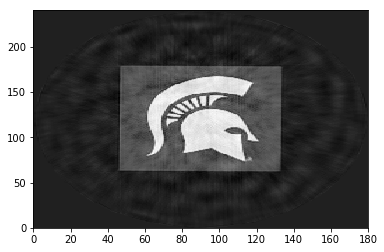

In [54]:
# Put your code here
reverse = iradon_sart(sinogram, theta=None, image=None, projection_shifts=None, clip=None, relaxation=0.75)
plt.imshow(reverse, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

plt.show()

**Question (10 points):**  Now, write a loop to implement the iteration in SART 20 times. For each iteration, print the mean squared error (between the true image and the reconstructed image) to the screen. You should see the error decreases as the number of iteration increases.

**Hint:** turning off image display could accelerate the time for each iteration.

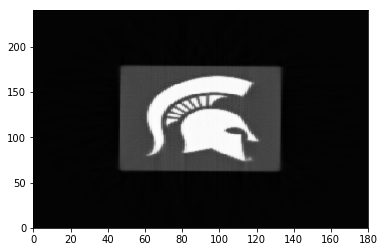

In [58]:
# Put your code here
reverse = iradon_sart(sinogram, theta=None, image=None, projection_shifts=None, clip=None, relaxation=0.15)
plt.imshow(reverse, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

plt.show()

---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 4".
---

## Part 6: Writing a simple Python class (20 points)

In this part we will write a simple python class. For the section, take N to be a positive integer.

A company has a team of (N+1) employees, including N team members and 1 supervisor. Each member is simultaneously working on 3 projects. The projects are named as 0, 1, and 2, respectively. A member's current progress on a given project is a random floating number between 0 and 100.

A class called "Employee" is given below. Each employee has an attribute 'name' (type: string) and a method which can print the text " XXX is in the team." where XXX is the name of the employee.

**Question (20 points):** Write a new class called "Member" which inherits from "Employee". This Member class should be design such that each member has an attribute `progress` consisting of 3 random floating numbers between 0 and 100. Each member should also have a class method which prints that member's progress on all the three projects.

Using your new class, **create a list of N=5 members with names "member0, member1, member2, ..." and test the progress method you created for one of the members.**

Then, write another new class called "Supervisor" which also inherits from "Employee". Each supervisor should have a class method that takes a list of N members and checks their progress on a specific project (0, 1, or 2). This method should work in the following way:

>When the method is called to check the progress on a project, it prints each member's name and his/her corresponding progress on this project in an increasing order. For example, if N=3 and the progress of member0, member1, member2 on project 1 are respectively 55.865, 98.324, 32.159, then the output should be: <br>

>member2 32.159 <br>
member0, 55.865 <br>
member1, 98.324 <br>

Of course, one should be able to use the method for project 0 and project 2 as well. Finally, create 1 supervisor and assign your favorite name to it.


In [ ]:
member0 = Member("member0")
member1 = Member("member1")
member2 = Member("member2")
member3 = Member("member3")
member4 = Member("member4")
member0.get_progress()

In [96]:
# Complete the code following the directions above
import random
class Employee():
    def __init__(self,name=''):
        self.init_employee()
        self.name = name
    
    def get_info(self):
        print(self.name, "is in the team.")
class Member(Employee):
    def init_employee(self,progress=0):
        self
        self.progress = [random.uniform(0,100),random.uniform(0,100),random.uniform(0,100)]
    def get_progress(self):
        return self.progress
        print(" progress on project0: ",self.progress[0])
        print(" progress on project1: ",self.progress[1])
        print(" progress on project2: ",self.progress[2],)
    def new_employer(self):
        return [random.uniform(0,100),random.uniform(0,100),random.uniform(0,100)]
class Supervisor(Member):
    def init_supervisor(self):
        None
    def get_result(self,N):
        total=[]
        for i in range (N):
            total=[]
            a=self.change()
            total.append({"member"+str(i): a})
            print(total)
            
a = Supervisor()   
a.get_result(3)
            
    


[{'member0': [29.12740936866608, 73.03021313646518, 24.021059297715674]}]
[{'member1': [29.12740936866608, 73.03021313646518, 24.021059297715674]}]
[{'member2': [29.12740936866608, 73.03021313646518, 24.021059297715674]}]


---
### STOP: Save the current state of your notebook, commit the changes to your local repository and push those changes to the remote repository. Use the commit message "Committing Part 6".
---

## You're done! Congrats on finishing your CMSE 202 Midterm!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.